# <font color=blue>Final Revised CNN Model</font>

# <font color=blue>DATASET 3 MODEL TRAINING Process</font>

## <font color=blue>50% phishing - 10,164 URLs | 50% benign - 10,164 URLs</font>

## <font color=blue>Chosen Dataset</font>

## Result: 
- batch_size=128, epochs=80
- CNN: Accuracy on training Data: 94.56%
- CNN: Accuracy on TEST Data: 94.36%


## Import Library

In [1]:
# Fix random seeds for Reproducibility

from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

In [2]:
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [3]:
# data
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#evaluation, analyzing results
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#demonstration of calculating metrics for a neural network model using sklearn
import tensorflow.keras as k

#train neural network
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print(tf.__version__)

import datetime


Instructions for updating:
non-resource variables are not supported in the long term
2.4.0


In [4]:
load_ext tensorboard

## Importing the dataset

In [5]:

dataset = pd.read_csv("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Feature-Extraction-ntbk/FE-more-data/FINAL-traindata.csv")



In [6]:
dataset

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
0,NaN,0,0,1,3,0,0,0,0,0,0,1,1,0,2,0,0
1,NaN,0,0,1,4,0,0,0,0,0,0,1,1,0,4,0,0
2,NaN,0,0,0,2,0,0,0,0,0,1,1,1,0,7,0,0
3,NaN,0,0,1,4,0,0,0,0,0,1,1,1,0,3,0,0
4,NaN,0,0,0,2,0,0,0,0,0,1,1,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20323,gkjx168.com,0,0,0,1,0,0,0,0,0,1,0,1,0,4,0,1
20324,habbocreditosparati.blogspot.com,0,0,0,0,0,0,1,0,1,1,1,1,1,4,1,1
20325,creditiperhabbogratissicuro100.blogspot.com,0,0,1,3,0,0,1,0,1,1,1,1,1,6,1,1
20326,mundovirtualhabbo.blogspot.com,0,0,1,1,0,0,1,0,1,1,1,1,1,7,1,1


In [7]:
# Look for missing values
dataset.isnull().sum()   

# No missing values found, so no need to drop or replace any value

domain               9280
ip_present              0
at_present              0
url_length              0
url_depth               0
redirection             0
https_domain            0
short_url               0
prefix/suffix           0
dns_record              0
web_traffic             0
domain_age              0
domain_end              0
dot_count               0
specialchar_count       0
subdom_count            0
label                   0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    10164
1    10164
Name: label, dtype: int64

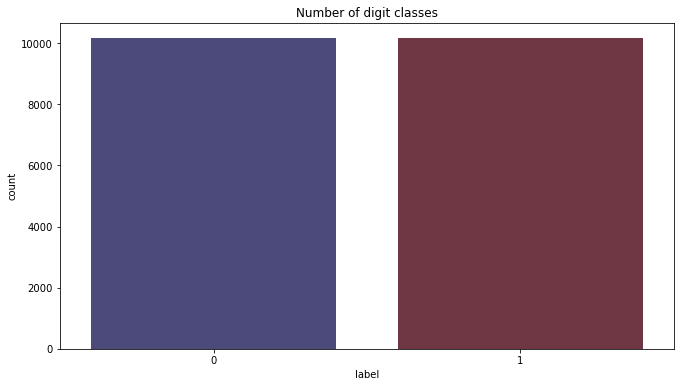

In [8]:
# visualize number of label classes

plt.figure(figsize=(11,6))
g = sns.countplot(dataset['label'], palette="icefire")
plt.title("Number of digit classes")
dataset['label'].value_counts()

In [9]:
dataset.columns

Index(['domain', 'ip_present', 'at_present', 'url_length', 'url_depth',
       'redirection', 'https_domain', 'short_url', 'prefix/suffix',
       'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count',
       'specialchar_count', 'subdom_count', 'label'],
      dtype='object')

In [10]:
dataset.describe()

,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
count,20328.0,20328.000000,20328.000000,20328.000000,20328.000000,20328.0,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000,20328.000000
mean,0.0,0.022383,0.420307,2.496311,0.007723,0.0,0.098386,0.128247,0.037584,0.772924,0.724223,0.888135,0.255264,5.476928,0.418388,0.500000
std,0.0,0.147929,0.493620,1.851416,0.087545,0.0,0.297844,0.334373,0.190192,0.418952,0.446916,0.315209,0.436020,4.951982,0.493307,0.500012
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,22.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.000000,1.000000,1.000000


# Split Train/Val/Test

In [11]:
# Shuffle
# shuffle dataset **once**, but reliably so that each run yields the same results

data = shuffle(dataset, random_state=32)

data

,domain,ip_present,at_present,url_length,url_depth,redirection,https_domain,short_url,prefix/suffix,dns_record,web_traffic,domain_age,domain_end,dot_count,specialchar_count,subdom_count,label
19582,forms.office.com,0,0,1,2,0,0,0,0,0,1,1,1,1,9,1,1
1004,NaN,0,0,0,3,0,0,0,0,0,1,1,1,0,2,1,0
4867,NaN,0,0,0,6,0,0,0,0,0,1,1,1,0,5,0,0
12777,573805.selcdn.ru,0,0,1,3,0,0,0,0,0,1,0,1,1,6,1,1
17732,xj3pr.mjt.lu,0,0,1,5,0,0,0,0,0,1,1,1,0,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,nesn.com,0,0,1,3,0,0,0,0,0,1,0,1,0,7,0,0
19527,kurortnoye.com.ua,0,1,1,3,0,0,0,0,0,0,1,0,1,8,1,1
9526,NaN,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0
9771,NaN,0,0,0,3,0,0,0,0,0,1,1,1,0,2,0,0


In [12]:

feature_col = ['ip_present', 'at_present', 'url_length', 'url_depth', 'redirection', 'https_domain', 'short_url', 'prefix/suffix', 'dns_record', 'web_traffic', 'domain_age', 'domain_end', 'dot_count', 'specialchar_count', 'subdom_count']
target_col = ['label']

#feature_col = data.iloc[:, 1:16]
#target_col = data.iloc[:, [16]]


In [13]:
feature_col

['ip_present',
 'at_present',
 'url_length',
 'url_depth',
 'redirection',
 'https_domain',
 'short_url',
 'prefix/suffix',
 'dns_record',
 'web_traffic',
 'domain_age',
 'domain_end',
 'dot_count',
 'specialchar_count',
 'subdom_count']

In [14]:
target_col

['label']

In [15]:
# Separating & assigning features and target columns to X & y

y = pd.DataFrame(data[target_col]) #y target
X = data[feature_col] #X feature


X.shape, y.shape

((20328, 15), (20328, 1))

In [16]:
print(X.columns.values)

['ip_present' 'at_present' 'url_length' 'url_depth' 'redirection'
 'https_domain' 'short_url' 'prefix/suffix' 'dns_record' 'web_traffic'
 'domain_age' 'domain_end' 'dot_count' 'specialchar_count' 'subdom_count']


In [17]:
# Spliting the dataset into Training and Test Set


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size=0.3, random_state=12)


X_train.shape, X_test.shape

#70% training
#30% test



((14229, 15), (6099, 15))

In [18]:

## Original dataset
y_legw = y.label.value_counts()[0]/(y.label.count())
y_phishw = y.label.value_counts()[1]/(y.label.count())

print("********************** Proportion on the give dataset before the split ********************** \n")
print("Percentage of Legitimate websites :", y_legw)
print("Percentage of Phishing websites   :", y_phishw, "\n")


## Training dataset
y_train_legw = y_train.label.value_counts()[0]/(y_train.label.count())
y_train_phishw = y_train.label.value_counts()[1]/(y_train.label.count())

print("********************** Proportion on the Training datase t**********************\n")
print("Percentage of Legitimate websites :", y_train_legw)
print("Percentage of Phishing websites   :", y_train_phishw, "\n")


## Testing dataset
y_test_legw = y_test.label.value_counts()[0]/(y_test.label.count())
y_test_phishw = y_test.label.value_counts()[1]/(y_test.label.count())

print("********************** Proportion on the Testing dataset **********************\n")
print("Percentage of Legitimate websites :", y_test_legw)
print("Percentage of Phishing websites   :", y_test_phishw, "\n")



********************** Proportion on the give dataset before the split ********************** 

Percentage of Legitimate websites : 0.5
Percentage of Phishing websites   : 0.5 

********************** Proportion on the Training datase t**********************

Percentage of Legitimate websites : 0.5000351395038302
Percentage of Phishing websites   : 0.4999648604961698 

********************** Proportion on the Testing dataset **********************

Percentage of Legitimate websites : 0.499918019347434
Percentage of Phishing websites   : 0.500081980652566 



In [19]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 14229 rows and 15 columns

Dimensions of the testing dataset : 6099 rows and 15 columns



## Standardize the Data

In [20]:
# Converting target variables from dataframe to an array

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)



In [21]:
y_train, y_test

(array([1, 0, 1, ..., 0, 0, 1]), array([1, 0, 0, ..., 1, 0, 1]))

In [22]:
## Normalize data using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:

print(X_train)
print('')
print(type(X_train))


[[ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.51478804
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ... -0.58749495  0.31870202
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ...  1.7021423   0.94381956
  -0.85167756]
 ...
 [ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.93153307
   1.17415327]
 [ 0.         -0.14800211 -0.85882175 ... -0.58749495 -0.51478804
  -0.85167756]
 [ 0.         -0.14800211  1.16438598 ...  1.7021423   1.36056459
   1.17415327]]

<class 'numpy.ndarray'>


In [24]:
print(X_train.shape)

print(X_test.shape)




(14229, 15)
(6099, 15)


In [25]:

## Displaying the dimensions present in the dataset

print("Dimensions of the original dataset :",X.shape[0], "rows and",X.shape[1],"columns\n")

print("Dimensions of the training dataset :",X_train.shape[0], "rows and",X_train.shape[1],"columns\n")

print("Dimensions of the testing dataset :",X_test.shape[0], "rows and",X_test.shape[1],"columns\n")

#print("Dimensions of the validation dataset :",X_val.shape[0], "rows and",X_val.shape[1],"columns\n")


Dimensions of the original dataset : 20328 rows and 15 columns

Dimensions of the training dataset : 14229 rows and 15 columns

Dimensions of the testing dataset : 6099 rows and 15 columns




# <font color=red>Machine Learning Models & Training</font>


In [26]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append("{:.2f}%" .format (a, 2))
    acc_test.append("{:.2f}%" .format (b, 2))
    
    
   

## Decision Tree

In [27]:
## Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

## instantiate the DecisionTreeClassifier model with criterion gini index
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=9)
## fit the model 
tree.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)


## Computing the accuracy of the model performance
acc_train_tree = (accuracy_score(y_train,y_train_tree)*100)
acc_test_tree = (accuracy_score(y_test,y_test_tree)*100)

print("Decision Tree: Accuracy on training Data: %.2f%%" % (acc_train_tree))
print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_test_tree))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set

#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(tree.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(tree.score(X_test, y_test) * 100,2), "%")


Decision Tree: Accuracy on training Data: 88.85%
Decision Tree: Accuracy on TEST Data: 89.13%


In [28]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## Decision Tree Report on Test Data

In [29]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Decision Tree on Test Data')
print('')

print("Decision Tree: Accuracy on TEST Data: %.2f%%" % (acc_test_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_test_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_test, y_test_tree))



Performance Evaluation of Decision Tree on Test Data

Decision Tree: Accuracy on TEST Data: 89.13%

Decision Tree Confusion Matrix:
[[2881  168]
 [ 495 2555]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3049
           1       0.94      0.84      0.89      3050

    accuracy                           0.89      6099
   macro avg       0.90      0.89      0.89      6099
weighted avg       0.90      0.89      0.89      6099



In [30]:
print('Decision Tree Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_tree)
print('F1 score: %.2f%%' % f1)



Decision Tree Test Data
Accuracy: 0.89%
Precision: 0.94%
Recall: 0.84%
F1 score: 0.89%


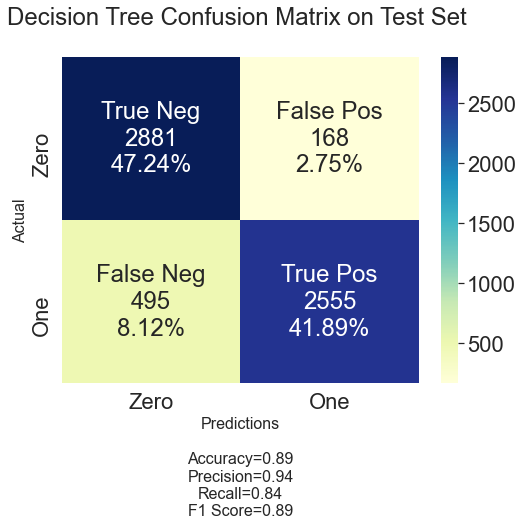

In [31]:
tree_matrix_test = confusion_matrix(y_test, y_test_tree)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6), 
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Test Set \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories)

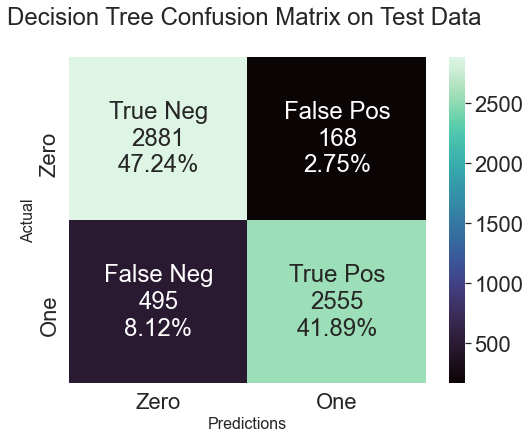

In [32]:
## For Documentation

##Get the confusion matrix

tree_matrix_test = confusion_matrix(y_test, y_test_tree)
sns.set(font_scale=2)

print('')
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Test Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_test, 
                      group_names=labels,
                      categories=categories)


plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-test-tree-DOCU.png", bbox_inches='tight', pad_inches=0)


## Decision Tree Report on Training Data

In [33]:
## Classification Report - complete
## Predict the values from the training set

print('Performance Evaluation of Decision Tree on Training Data')
print('')

print("Decision Tree: Accuracy on Training Data: %.2f%%" % (acc_train_tree))

print('')
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_train, y_train_tree))

print('')
print('Decision Tree Classification Report: \n')
print(classification_report(y_train, y_train_tree))



Performance Evaluation of Decision Tree on Training Data

Decision Tree: Accuracy on Training Data: 88.85%

Decision Tree Confusion Matrix:
[[6702  413]
 [1174 5940]]

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7115
           1       0.93      0.83      0.88      7114

    accuracy                           0.89     14229
   macro avg       0.89      0.89      0.89     14229
weighted avg       0.89      0.89      0.89     14229



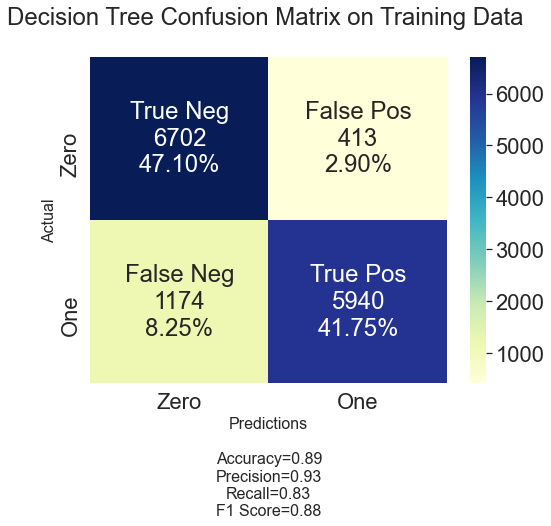

In [34]:
tree_matrix_train = confusion_matrix(y_train, y_train_tree)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Decision Tree Confusion Matrix on Training Data \n', fontsize=18):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text, fontsize=18)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories)

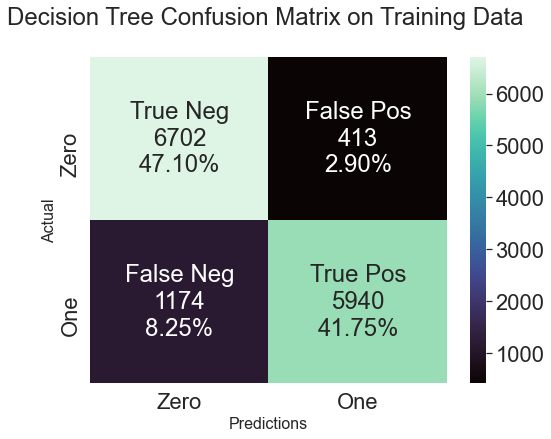

In [35]:
## For Documentation

##Get the confusion matrix
tree_matrix_train = confusion_matrix(y_train, y_train_tree)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Decision Tree Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(tree_matrix_train, 
                      group_names=labels,
                      categories=categories)

plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-train-tree-DOCU.png", bbox_inches='tight', pad_inches=0)


In [36]:
print('Decision Tree Training Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_tree)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_tree)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_tree)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_tree)
print('F1 score: %.2f%%' % f1)


#Observation: Individual calculations per metric are different from the CM table since 
#these formula actually looks or compute at class 1 by default


Decision Tree Training Data
Accuracy: 0.89%
Precision: 0.93%
Recall: 0.83%
F1 score: 0.88%


# Random Forest

In [37]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier

## instantiate the model
forest = RandomForestClassifier(criterion='gini', max_depth=6, random_state=11)

## fit the model 
forest.fit(X_train, y_train)

## predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


## Computing the accuracy of the model performance
acc_train_forest = (accuracy_score(y_train,y_train_forest)*100)
acc_test_forest = (accuracy_score(y_test,y_test_forest)*100)

print("Random Forest: Accuracy on training Data: %.2f%%" % (acc_train_forest))
print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_test_forest))


#Note: y_test are the true class labels 
#y_test_tree are the predicted class labels in the test set



#=============
#print the scores on training and test set
#print('Training set score: {:.4f}',round(forest.score(X_train, y_train) * 100,2), "%")
#print('Test set score: {:.4f}',round(forest.score(X_test, y_test) * 100,2), "%")


Random Forest: Accuracy on training Data: 90.41%
Random Forest: Accuracy on TEST Data: 90.77%


In [38]:
# storing the results. The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## Random Forest Report on Test Data

In [39]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of Random Forest on Test Data')
print('')

print("Random Forest: Accuracy on TEST Data: %.2f%%" % (acc_test_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_test_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_test, y_test_forest))



Performance Evaluation of Random Forest on Test Data

Random Forest: Accuracy on TEST Data: 90.77%

Random Forest Confusion Matrix:
[[2889  160]
 [ 403 2647]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3049
           1       0.94      0.87      0.90      3050

    accuracy                           0.91      6099
   macro avg       0.91      0.91      0.91      6099
weighted avg       0.91      0.91      0.91      6099



In [40]:
print('Random Forest Test Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, y_test_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, y_test_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, y_test_forest)
print('F1 score: %.2f%%' % f1)



Random Forest Test Data
Accuracy: 0.91%
Precision: 0.94%
Recall: 0.87%
F1 score: 0.90%


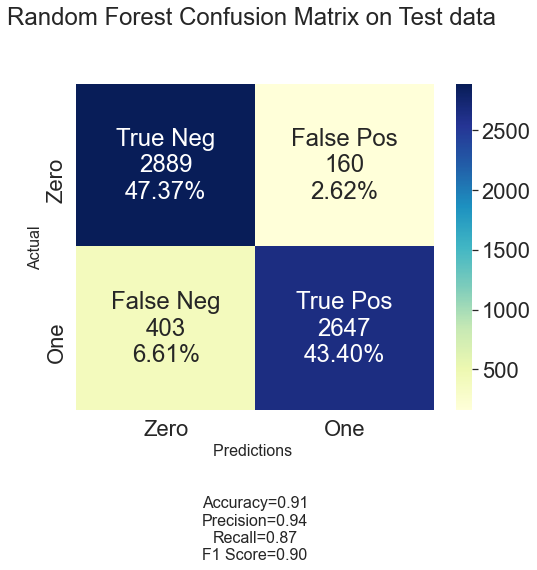

In [41]:

##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_test_forest)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title='Random Forest Confusion Matrix on Test data \n\n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions \n' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlGnBu', figsize=(8,6))


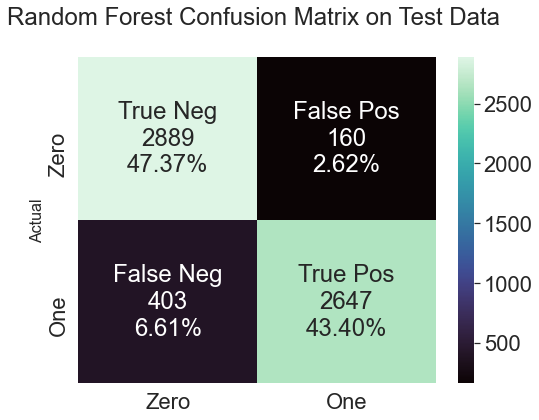

In [42]:
## For Documentation

##Get the confusion matrix
forest_matrix_test = confusion_matrix(y_test, y_test_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_test, 
                      group_names=labels,
                      categories=categories)

plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-test-forest-DOCU.png", bbox_inches='tight', pad_inches=0)


## Random Forest Report on Training Data

In [43]:
## Classification Report - complete
## Predict the values from the training set

print('Performance Evaluation of Random Forest on Training Data')
print('')

print("Random Forest: Accuracy on Training Data: %.2f%%" % (acc_train_forest))

print('')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_train, y_train_forest))

print('')
print('Random Forest Classification Report: \n')
print(classification_report(y_train, y_train_forest))



Performance Evaluation of Random Forest on Training Data

Random Forest: Accuracy on Training Data: 90.41%

Random Forest Confusion Matrix:
[[6707  408]
 [ 957 6157]]

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7115
           1       0.94      0.87      0.90      7114

    accuracy                           0.90     14229
   macro avg       0.91      0.90      0.90     14229
weighted avg       0.91      0.90      0.90     14229



In [44]:
print('Random Forest Training Data')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_train_forest)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, y_train_forest)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, y_train_forest)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, y_train_forest)
print('F1 score: %.2f%%' % f1)



Random Forest Training Data
Accuracy: 0.90%
Precision: 0.94%
Recall: 0.87%
F1 score: 0.90%


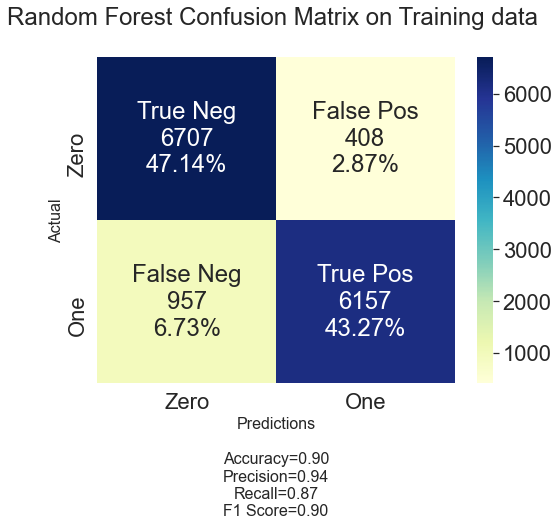

In [45]:

##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='Random Forest Confusion Matrix on Training data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16)
        plt.xlabel('Predictions' + stats_text, fontsize=16)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories)


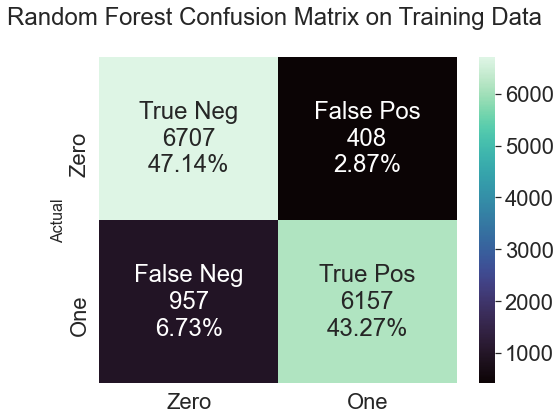

In [46]:
## For Documentation

##Get the confusion matrix
forest_matrix_train = confusion_matrix(y_train, y_train_forest)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='Random Forest Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(forest_matrix_train, 
                      group_names=labels,
                      categories=categories)

plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-train-forest-DOCU.png", bbox_inches='tight', pad_inches=0)




# <font color=red> CNN Model </font>

In [47]:
#importing required packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPool1D, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

import time
from datetime import datetime

from keras.callbacks import TensorBoard


In [48]:


# Reshaping data as expected by Sequential model
# convert to 3 dim array

X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1],1)

X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print("3 dim array as expected by cnn model")
print("X_train:", X_train_reshape.shape)
print("X_test:", X_test_reshape.shape)



3 dim array as expected by cnn model
X_train: (14229, 15, 1)
X_test: (6099, 15, 1)


## Evaluating CNN Model Traditionally (No KFold or Cross Validation)

In [49]:
# CNN model

#importing required packages

import tensorflow as tf
import tensorflow.keras as k

from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import GlobalMaxPooling1D, Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras import regularizers

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from sklearn.model_selection import KFold
import random as rn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [50]:
tf.random.set_random_seed(2)


# Model configuration
ADAM = Adam(learning_rate=0.0001)
verbosity = 2
l1 = regularizers.l1(0.0001)

INPUT_DIM = X_train_reshape[0].shape

                                # Define the model architecture
#--Layer Name
proposed = Sequential(name="Proposed_Model")
    
#--Input Layer
proposed.add(Conv1D(20, 3, activation='relu', input_shape = INPUT_DIM))
proposed.add(BatchNormalization())
proposed.add(Dropout(0.2))

#--Convo Layer 1
proposed.add(Conv1D(20, 3, activation='relu', padding='same', name="CONV_1"))
proposed.add(MaxPooling1D(2, name="POOLING_1"))

#--Convo Layer 2
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_2", kernel_regularizer=l1))
#--Convo Layer 3
proposed.add(Conv1D(40, 3, activation='relu', padding='same', name="CONV_3"))
#--Convo Layer 4
proposed.add(Conv1D(40, 5, activation='relu', padding='same', name="CONV_4"))
proposed.add(MaxPooling1D(2, name="POOLING_2", padding='same'))

#--Convo Layer 5
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_5", kernel_regularizer=l1))
#--Convo Layer 6
proposed.add(Conv1D(80, 3, activation='relu', padding='same', name="CONV_6"))
#--Convo Layer 7
proposed.add(Conv1D(160, 3, activation='relu', padding='same', name="CONV_7"))
proposed.add(MaxPooling1D(2, name="POOLING_3", padding='same'))
proposed.add(Dropout(0.4, name="DROPOUT_1"))

##-----Fully Connected Layer
proposed.add(Flatten(name="FC"))

##--First Fully Connected Layer 5
proposed.add(Dense(128, activation='relu', name='DENSE_1', kernel_regularizer=l1))

proposed.add(Dense(64, activation='relu', name='DENSE_2'))
proposed.add(Dropout(0.4, name="DROPOUT_2"))
    
##--Fully Connected Output Layer
proposed.add(Dense(2, activation='softmax', name="OUTPUT"))

# Compile the model
proposed.compile(loss='sparse_categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])


In [51]:
proposed.summary()

Model: "Proposed_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 13, 20)            80        
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 20)            80        
_________________________________________________________________
dropout (Dropout)            (None, 13, 20)            0         
_________________________________________________________________
CONV_1 (Conv1D)              (None, 13, 20)            1220      
_________________________________________________________________
POOLING_1 (MaxPooling1D)     (None, 6, 20)             0         
_________________________________________________________________
CONV_2 (Conv1D)              (None, 6, 40)             2440      
_________________________________________________________________
CONV_3 (Conv1D)              (None, 6, 40)          

In [52]:
# Extracting the features & storing them in a list
# Lexical Features

# starting time
start_time = time.time()
print('\n')
print('Starting CNN Model training.... \n')

##===================================##

## Train the Model

history = proposed.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test),
                    batch_size=128, epochs=80, verbose=2, shuffle = False)




# Score metrics from the model
print('')
score = proposed.evaluate(X_test_reshape, y_test, verbose=2)

# Displays the accuracy of correct sentiment prediction over test data
print('')
print("Test loss: %.2f%%" % score[0])
print("Test accuracy: %.2f%%" % (score[1]*100))

##===================================##

elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time))
print('\n')
print(f"Runtime: CNN Model Training:  {elapsed}")


print('\n\n\n\n')
print("***Completed")




Starting CNN Model training.... 

Train on 14229 samples, validate on 6099 samples
Epoch 1/80


/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


14229/14229 - 3s - loss: 0.8522 - acc: 0.7011 - val_loss: 0.7770 - val_acc: 0.8501
Epoch 2/80
14229/14229 - 2s - loss: 0.6494 - acc: 0.8518 - val_loss: 0.6463 - val_acc: 0.8775
Epoch 3/80
14229/14229 - 2s - loss: 0.5736 - acc: 0.8742 - val_loss: 0.5124 - val_acc: 0.9047
Epoch 4/80
14229/14229 - 2s - loss: 0.5088 - acc: 0.8932 - val_loss: 0.4404 - val_acc: 0.9228
Epoch 5/80
14229/14229 - 2s - loss: 0.4673 - acc: 0.9008 - val_loss: 0.4164 - val_acc: 0.9231
Epoch 6/80
14229/14229 - 2s - loss: 0.4477 - acc: 0.9001 - val_loss: 0.3895 - val_acc: 0.9287
Epoch 7/80
14229/14229 - 2s - loss: 0.4271 - acc: 0.9030 - val_loss: 0.3805 - val_acc: 0.9279
Epoch 8/80
14229/14229 - 2s - loss: 0.4112 - acc: 0.9039 - val_loss: 0.3605 - val_acc: 0.9329
Epoch 9/80
14229/14229 - 2s - loss: 0.3952 - acc: 0.9062 - val_loss: 0.3509 - val_acc: 0.9313
Epoch 10/80
14229/14229 - 2s - loss: 0.3856 - acc: 0.9079 - val_loss: 0.3452 - val_acc: 0.9249
Epoch 11/80
14229/14229 - 2s - loss: 0.3772 - acc: 0.9102 - val_loss: 

In [53]:

## Evaluate model scores

acc_train_cnn = (proposed.evaluate(X_train_reshape, y_train)[1]*100)
acc_test_cnn = (proposed.evaluate(X_test_reshape, y_test)[1]*100)

print("batch_size=128, epochs=80")
print('')
print("CNN: Accuracy on training Data: %.2f%%" % (acc_train_cnn))
print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


batch_size=128, epochs=80

CNN: Accuracy on training Data: 94.56%
CNN: Accuracy on TEST Data: 94.36%


In [54]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)




## <font color=red> CNN Model Learning, Loss and Accuracy Curves </font>

In [55]:
history.history


{'loss': [0.8522115564453551,
  0.6494441611344234,
  0.5736448102610974,
  0.5087844619924232,
  0.4672601285993831,
  0.44769334112385584,
  0.42707745945456155,
  0.41115823821028197,
  0.39516764307015395,
  0.3856345230885103,
  0.37722412902662594,
  0.36625605361662206,
  0.3564656874842633,
  0.349905600548377,
  0.34511316752130494,
  0.34020845417028334,
  0.33023961066311647,
  0.3270837510618191,
  0.32093432417270445,
  0.3159046820875749,
  0.3098023091614041,
  0.3036782212963308,
  0.30444543592391476,
  0.2957118366538569,
  0.2922634490719749,
  0.2895217208921285,
  0.28500385927512245,
  0.2802317447903302,
  0.2779037894950629,
  0.27869342589958107,
  0.27087200720325794,
  0.26981041382667564,
  0.26482744929544016,
  0.26008090584416677,
  0.2587232415503029,
  0.25804740453362923,
  0.2549803670951559,
  0.25008499948874036,
  0.24572223502407173,
  0.24796599018799126,
  0.24231204205059823,
  0.24533789171188308,
  0.2408286210923698,
  0.2388286024522644,
  

In [56]:

# list all data in history
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


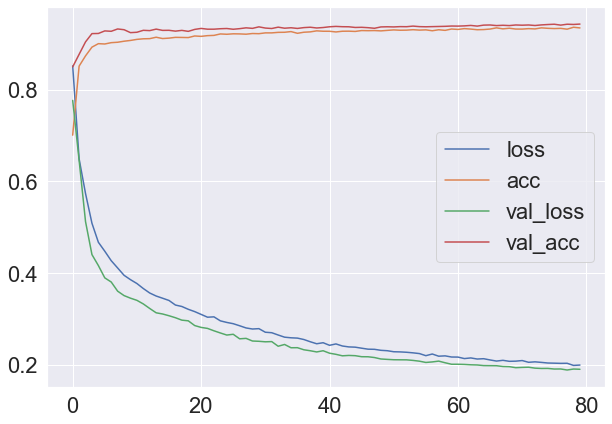

In [57]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

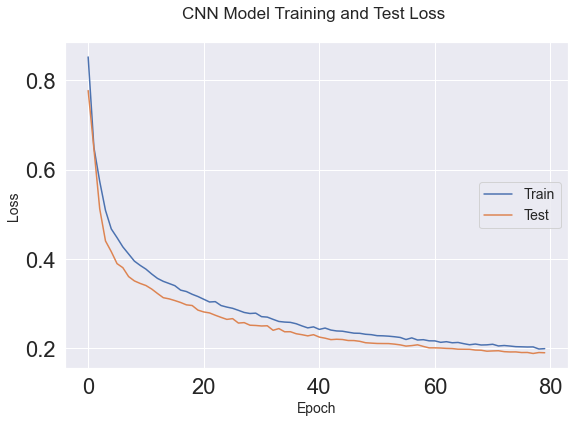

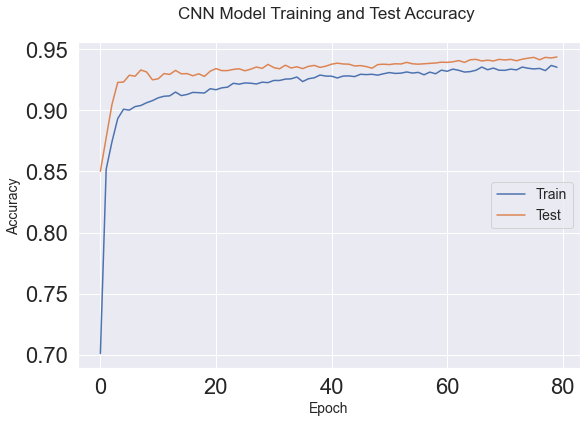

In [58]:
## As shown in docu

## Plot training & test loss values
## Computing Loss Result on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Training and Test Loss \n', fontsize=17)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='center right', fontsize=14)
#plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/val-loss.png')
plt.show()

print('\n')

## Plot training & test accuracy values
## Computing Accuracy on Training And Test Results
plt.figure(figsize=(9,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Train', 'Test'], loc='center right', fontsize=14)
#plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/test-acc-docu.png')
plt.show()


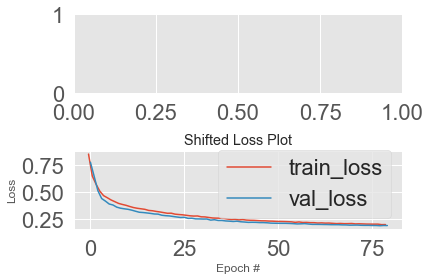

In [59]:
# determine the total number of epochs used for training, then
# initialize the figure
epochs = np.arange(0, len(history.history["loss"]))
plt.style.use("ggplot")
(fig, axs) = plt.subplots(2, 1)

# plot the *shifted* training and validation loss
axs[1].plot(epochs - 0.5, history.history["loss"], label="train_loss")
axs[1].plot(epochs, history.history["val_loss"], label="val_loss")
axs[1].set_title("Shifted Loss Plot")
axs[1].set_xlabel("Epoch #")
axs[1].set_ylabel("Loss")
axs[1].legend()
# show the plots
plt.tight_layout()
plt.show()

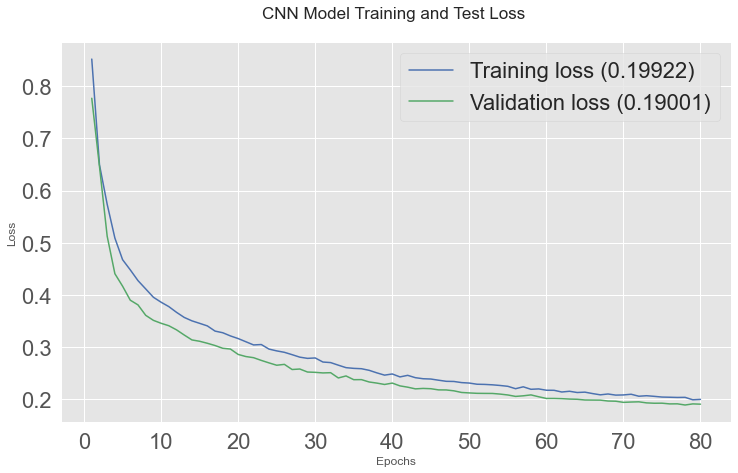

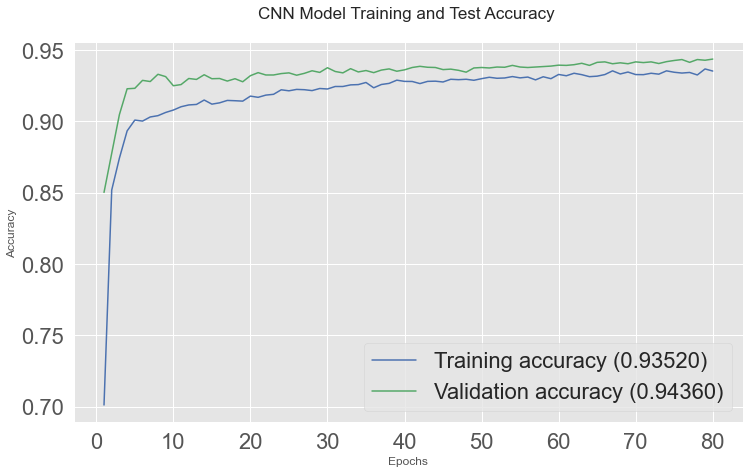

In [60]:
## For Documentation

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(figsize=(12,7))
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('CNN Model Training and Test Loss \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-loss-DOCU.png')

    
    print('\n \n')
    
    ## Accuracy
    plt.figure(figsize=(12,7))
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('CNN Model Training and Test Accuracy \n', fontsize=17)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/train-acc-DOCU.png')
    plt.show()
    

#plot the graph
plot_history(history)


# <font color=green> Save Proposed CNN Model as hd5 file </font>

In [61]:

# Save Model h5

tf.keras.models.save_model(proposed, '/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Proposed-Final-CNN.h5')


In [62]:
from keras.models import model_from_json

# serialize model to JSON
model_json = proposed.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
proposed.save_weights("proposed.h5")
print("Saved model to disk")

Saved model to disk


## CNN Report on Test Data


In [63]:
# Evaluating The Test Set
##To get predictions from the model for the test set, we call model.predict().


X_test = np.array(X_test_reshape)

predictions = proposed.predict(X_test_reshape, batch_size=10, verbose=0)  

# Predicting results for test dataset
pred_cnn = proposed.predict(X_test_reshape)

# Predicting results for tain dataset
train_cnn = proposed.predict(X_train_reshape)


# Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels
# Solution, round off the output which will convert the float values into an integer
# use np.argmax() to select the index number which has a higher value in a row


/Users/jillkathleen/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [64]:
predictions

array([[4.4282169e-05, 9.9995577e-01],
       [9.9912375e-01, 8.7622082e-04],
       [9.9999094e-01, 9.0435124e-06],
       ...,
       [1.1342057e-04, 9.9988651e-01],
       [9.9999774e-01, 2.3174223e-06],
       [2.5933675e-06, 9.9999738e-01]], dtype=float32)

In [65]:
predictions = np.argmax(np.round(predictions),axis=1)
predictions

array([1, 0, 0, ..., 1, 0, 1])

In [66]:
train_cnn = np.argmax(np.round(train_cnn),axis=1)

pred_cnn = np.argmax(np.round(pred_cnn),axis=1)


pred_cnn, train_cnn

(array([1, 0, 0, ..., 1, 0, 1]), array([1, 0, 1, ..., 0, 0, 1]))

In [67]:

pred_cnn.shape, train_cnn.shape


((6099,), (14229,))

In [68]:
# summarize the first 5 cases

for i in range(5):
    print('%s => %d (expected %d)' % (X_test_reshape[i].tolist(), predictions[i], y_test[i]))

[[0.0], [-0.14800211183536424], [-0.8588217483606949], [-1.3529062918199035], [-0.08745389388932522], [0.0], [-0.327589949628001], [2.589984041413749], [-0.19241502165441335], [0.5395189192109512], [-1.6305769462618553], [0.3519160098258165], [-0.5874949463342097], [-0.3064155243859807], [1.1741532726706378]] => 1 (expected 1)
[[0.0], [-0.14800211183536424], [-0.8588217483606949], [0.2740343194688313], [-0.08745389388932522], [0.0], [-0.327589949628001], [-0.38610276511748215], [-0.19241502165441335], [-1.8535031198952283], [0.6132798591888158], [0.3519160098258165], [-0.5874949463342097], [-0.3064155243859807], [-0.8516775648254828]] => 0 (expected 0)
[[0.0], [-0.14800211183536424], [-0.8588217483606949], [-0.8105927547236585], [-0.08745389388932522], [0.0], [3.052596702479922], [-0.38610276511748215], [-0.19241502165441335], [0.5395189192109512], [0.6132798591888158], [0.3519160098258165], [-0.5874949463342097], [-0.9315330683290297], [1.1741532726706378]] => 0 (expected 0)
[[0.0], [

In [69]:
##  y_pred and y_test compare

print('Predictions: ', predictions[:10])

print( 'Actual:      ', y_test[:10])

Predictions:  [1 0 0 1 0 1 0 0 0 1]
Actual:       [1 0 0 1 0 1 0 1 0 1]


In [70]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Test Data')
print('')

print("CNN: Accuracy on TEST Data: %.2f%%" % (acc_test_cnn))


print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_test, pred_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_test, pred_cnn))

print('')
score = proposed.evaluate(X_test, y_test, verbose=1)
print('Score Results: Loss, Accuracy',score)

Performance Evaluation of CNN on Test Data

CNN: Accuracy on TEST Data: 94.36%

CNN Confusion Matrix:
[[2895  154]
 [ 190 2860]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3049
           1       0.95      0.94      0.94      3050

    accuracy                           0.94      6099
   macro avg       0.94      0.94      0.94      6099
weighted avg       0.94      0.94      0.94      6099


Score Results: Loss, Accuracy [0.1900106089479475, 0.9435973]


In [71]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Testing Data')

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_test, pred_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_test, pred_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_test, pred_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))

Performance Evaluation of CNN on Testing Data

Accuracy: 0.94%
Precision: 0.95%
Recall: 0.94%
F1 score: 0.94%


F1 score: 94.33%
Recall: 93.77%
Precision: 94.89%
Accuracy: 94.36%


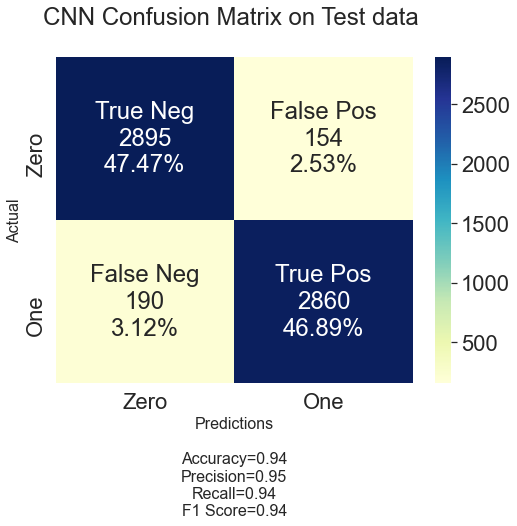

In [72]:

##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6), 
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Test data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)


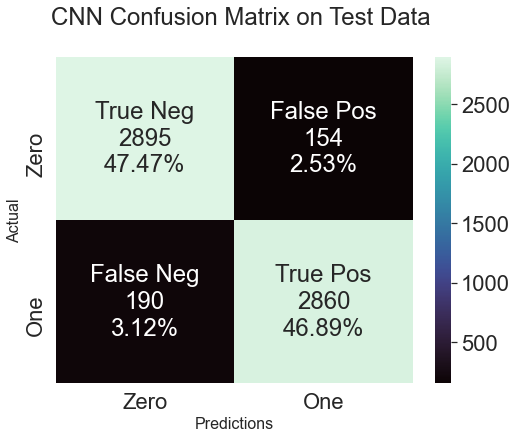

In [73]:
## For Documentation

##Get the confusion matrix
cnn_matrix_test = confusion_matrix(y_test, pred_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Test Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako', figsize=(8,6))

plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-test-DOCU.png", bbox_inches='tight', pad_inches=0)


<AxesSubplot:>

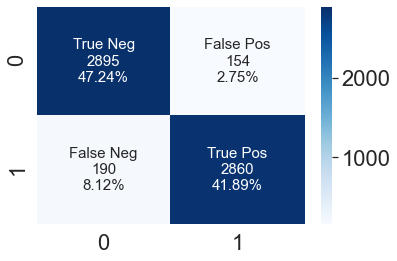

In [74]:
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnn_matrix_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     tree_matrix_test.flatten()/np.sum(cnn_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnn_matrix_test, annot=labels, fmt='', cmap='Blues', annot_kws={'size': 15})


## CNN Report on Training Data

In [75]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Training Data')
print('')

print("CNN: Accuracy on Training Data: %.2f%%" % (acc_train_cnn))

print('')
print('CNN Confusion Matrix:')
print(confusion_matrix(y_train, train_cnn))

print('')
print('CNN Classification Report: \n')
print(classification_report(y_train, train_cnn))

print('')
score = proposed.evaluate(X_train_reshape, train_cnn, verbose=1)
print('Score Results: Loss, Accuracy',score)


Performance Evaluation of CNN on Training Data

CNN: Accuracy on Training Data: 94.56%

CNN Confusion Matrix:
[[6737  378]
 [ 396 6718]]

CNN Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7115
           1       0.95      0.94      0.95      7114

    accuracy                           0.95     14229
   macro avg       0.95      0.95      0.95     14229
weighted avg       0.95      0.95      0.95     14229


Score Results: Loss, Accuracy [0.14160848318613106, 1.0]


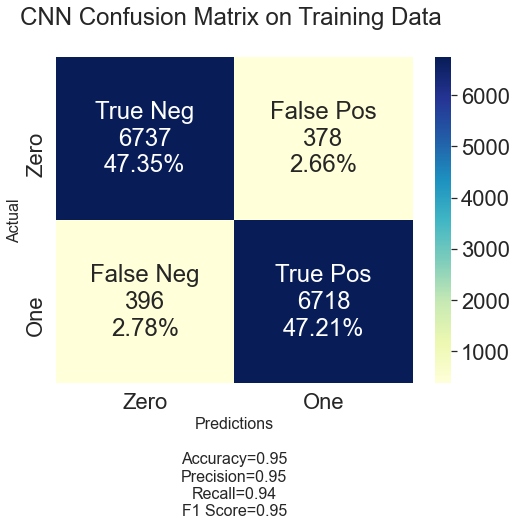

In [76]:

##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)


def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='YlGnBu',
                          title='CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.2f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions' + stats_text, fontsize=16) #Predicted label
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_train, 
                      group_names=labels,
                      categories=categories)


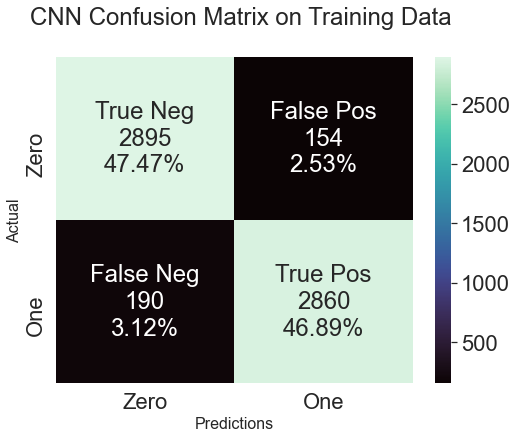

In [77]:
## For Documentation

##Get the confusion matrix
cnn_matrix_train = confusion_matrix(y_train, train_cnn)
sns.set(font_scale=2)
print('')

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,6),
                          cmap='mako',
                          title='   CNN Confusion Matrix on Training Data \n'):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual', fontsize=16) #True label
        plt.xlabel('Predictions', fontsize=16) #Predicted label
    
    if title:
        plt.title(title)
        

        
#visualize
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cnn_matrix_test, 
                      group_names=labels,
                      categories=categories)

plt.savefig("/Users/jillkathleen/Desktop/Phishing-Analysis-Detection/Back-End/Model-ntbk/Graph-Visuals/cm-cnn-train-DOCU.png", bbox_inches='tight', pad_inches=0)


In [78]:
## Classification Report - complete
## Predict the values from the test set

print('Performance Evaluation of CNN on Training Data')

print('')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, train_cnn)
print('Accuracy: %.2f%%' % accuracy)


#Precision – What percent of your predictions were correct?
#Precision – Accuracy of positive predictions
#Precision is the ability of a classifier not to label an instance positive that is actually negative
#Precision = TP/(TP + FP)
precision = precision_score(y_train, train_cnn)
print('Precision: %.2f%%' % precision)


#Recall – What percent of the positive cases did you catch? 
#Recall: Fraction of positives that were correctly identified.
#Recall is the ability of a classifier to find all positive instances.
#Recall = TP/(TP+FN)
recall = recall_score(y_train, train_cnn)
print('Recall: %.2f%%' % recall)


#F1 score – What percent of positive predictions were correct? 
#F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1 = f1_score(y_train, train_cnn)
print('F1 score: %.2f%%' % f1)


print('\n')
print('F1 score: %.2f%%' % (f1*100))
print('Recall: %.2f%%' % (recall*100))
print('Precision: %.2f%%' % (precision*100))
print('Accuracy: %.2f%%' % (accuracy*100))

Performance Evaluation of CNN on Training Data

Accuracy: 0.95%
Precision: 0.95%
Recall: 0.94%
F1 score: 0.95%


F1 score: 94.55%
Recall: 94.43%
Precision: 94.67%
Accuracy: 94.56%




# <font color=green> Predicted vs Actual Results </font>

In [79]:
## Compare actual and expected values

## The complete example below makes predictions for each example in the dataset, then prints the input data, predicted class and expected class for the first 5 examples in the dataset.
# make class predictions with the model
#predict = proposed.predict_classes(X_test)
# summarize the first 5 cases

m=0
for i in range(len(X_test_reshape)):
    if pred_cnn[i]==1:
        m=m+1
    print('Predicted %d---> Expected %d' % (pred_cnn[i], y_test[i]))
    

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
P

Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
P

Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 0---> Expected 0
Predicted 0---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
P

# Comparison of Models

In [80]:
acc_train, acc_test

(['88.85%', '90.41%', '94.56%'], ['89.13%', '90.77%', '94.36%'])

In [81]:
results = ({'ML Model':  ML_Model,    
    'Train Accuracy':   acc_train,
    'Test Accuracy':   acc_test})

# Create DataFrame  
df = pd.DataFrame(results)

# Set Index
index_df = df.set_index([pd.Index([1,2,3])])

# Set alignment
align_df = index_df.style.set_properties(**{'text-align': 'center'})

print("Dataset 3 Results")
align_df

Dataset 3 Results


,ML Model,Train Accuracy,Test Accuracy
1,Decision Tree,88.85%,89.13%
2,Random Forest,90.41%,90.77%
3,CNN,94.56%,94.36%


In [82]:
#Sorting the dataframe on accuracy
index_df.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,CNN,94.56%,94.36%
2,Random Forest,90.41%,90.77%
1,Decision Tree,88.85%,89.13%


## Complete - End - Model Training